❗ Оставлены рекомендации ревьюера, проверившего проект

# Исследование объявлений о продаже квартир

В моём распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.  
  
 Все данные собраны в таблицу и подписаны следующим образом:

_airports_nearest_ — расстояние до ближайшего аэропорта в метрах (м);   
_balcony_ — число балконов;  
_ceiling_height_ — высота потолков (м);  
_cityCenters_nearest_ — расстояние до центра города (м);  
_days_exposition_ — сколько дней было размещено объявление (от публикации до снятия);  
_first_day_exposition_ — дата публикации;  
_floor_ — этаж;  
_floors_total_ — всего этажей в доме;  
_is_apartment_ — апартаменты (булев тип);  
_kitchen_area_ — площадь кухни в квадратных метрах (м²);  
_last_price_ — цена на момент снятия с публикации;  
_living_area_ — жилая площадь в квадратных метрах(м²);  
_locality_name_ — название населённого пункта;  
_open_plan_ — свободная планировка (булев тип);  
_parks_around3000_ — число парков в радиусе 3 км;  
_parks_nearest_ — расстояние до ближайшего парка (м);  
_ponds_around3000_ — число водоёмов в радиусе 3 км;  
_ponds_nearest_ — расстояние до ближайшего водоёма (м);  
_rooms_ — число комнат;  
_studio_ — квартира-студия (булев тип);  
_total_area_ — площадь квартиры в квадратных метрах (м²);  
_total_images_ — число фотографий квартиры в объявлении.


**Задачи**:
1. Посчитать цену квадратного метра;
2. Определить день недели, месяц и год публикации объявления;
3. Категоризировать данные по этажу квартиры; варианты — первый, последний, другой;
4. Найти соотношение жилой и общей площади, а также отношение площади кухни к общей.
  
**Задачи для исследовательского анализа**:
1. Изучить следующие параметры: площадь, цена, число комнат, высота потолков. Построить гистограммы для каждого параметра.
2. Изучить время продажи квартиры. Построить гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
3. Убрать редкие и выбивающиеся значения. Описать, какие особенности обнаружили.
4. Какие факторы больше всего влияют на стоимость квартиры? Изучить, зависит ли цена от площади, числа комнат, удалённости от центра. Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучить зависимость от даты размещения: дня недели, месяца и года.
5. Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитайть среднюю цену квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.
6. Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделить квартиры в Санкт-Петербурге (locality_name). Задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайть среднюю цену для каждого километра. Построить график: он должен показывать, как цена зависит от удалённости от центра. Определить границу, где график сильно меняется, — это и будет центральная зона.
7. Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделать выводы. Отличаются ли они от общих выводов по всей базе?

## Изучение данных из файла

In [ ]:
import pandas
import pandas as pd
import matplotlib.pyplot as plt
#import numpy as np
import seaborn as sns
#from datetime import datetime
#from pymystem3 import Mystem
#m = Mystem()


df = pd.read_csv('/datasets/real_estate_data.csv')

In [ ]:
df.head(20)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Данные невозможно прочесть, виной всему разделитель «\t», приведём таблицу к читаемому виду.

In [ ]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Теперь таблицу можно прочесть. Посмотрим информацию о ней методами info() и describe() и сделаем выводы

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

1. В данных есть пропуски в большинстве столбцов. На первый взгляд, они могли появиться потому, что эти поля были не обязательными для заполнения в объявлении, и их пропускали.
2. Некоторые столбцы представлены не в особо удобном формате 'float' и 'object', подробнее далее разберёмся, почему так, и поменяем формат на нужный.
3. В данных есть странные значения: 100-метровый потолок, жилплощадь 409 квадратных метров, 19 комнат. Это похоже на выбросы, но может быть и правдой, нужно проверить.

## Предобработка данных

### Обработка пропусков

Пропущенные значения есть в больше половине столбцов, интересно посмотреть, сколько их будет в процентном соотношении. Это поможет нам решить, от каких пропусков можно избавиться, какие оставить, а какие заполнить и чем.

In [ ]:
na_percent = (df.isna().sum()/len(df)*100).round(1) #округляем до 1 знака после запятой
na_percent.sort_values(ascending = False)

is_apartment            88.3
parks_nearest           65.9
ponds_nearest           61.6
balcony                 48.6
ceiling_height          38.8
airports_nearest        23.4
ponds_around3000        23.3
parks_around3000        23.3
cityCenters_nearest     23.3
days_exposition         13.4
kitchen_area             9.6
living_area              8.0
floors_total             0.4
locality_name            0.2
total_images             0.0
last_price               0.0
studio                   0.0
floor                    0.0
rooms                    0.0
first_day_exposition     0.0
total_area               0.0
open_plan                0.0
dtype: float64

Начнём с апартаментов: здесь более 88% данных пропущено. Посмотрим, какие данные вообще здесмь есть

In [ ]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Предполагаю, что это поле точно было необзательным для заполнения, поэтому его просто пропускали.  
  
Если мы заполним все пропуски значением False, то я боюсь, что мы испортим картину исследования: всего 50 аппартаментов на 24 тысячи квартир выглядит неправдоподобно, поэтому оставим эти пропуски как есть.

**'parks_nearest'** и **'ponds_nearest'**: эти данные очень точные, думаю, что они получены автоматически на основе картографических данных. А пропуски — это косяк системы, которая либо не выгрузила данные, либо их просто нет.
  
Эти пропуски тоже оставим нетронутыми — исследованию они не помешают, а если их заполнять вручную, то можно ошибиться.

Теперь посмотрю, какие значения есть в столбце **'balcony'**.

In [ ]:
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Будем считать, что все пропуски — это просто отсутствие балконов в квартирах/апартаментах, поэтому заменим их на нули.

In [ ]:
df['balcony'] = df['balcony'].fillna(0)

df['balcony'].isna().sum()

0

**'floors_total'** и  **'locality_name'** в этих столбцах пропусков меньше 1%, просто избавимся от них.

In [ ]:
df.dropna(subset = ['locality_name'], inplace = True)

df['locality_name'].isna().sum()

0

In [ ]:
df.dropna(subset = ['floors_total'], inplace = True)

df['floors_total'].isna().sum()

0

**'ceiling_height'**: высоту потолков, скорее всего, просто не заполняли вручную, отсюда и проопуски. Их мы оставить просто так не сможем, нужно будет заполнить. Будем заполнять их медианными значениями высот потолков, сгруппировав данные  по количеству этажей в доме. Как правило в домах старой или люкс застройки меньше этажей и высота потолков больше, а в бюджетных многоэтажках высота потолков минимальная, поэтому будет несправедливо брать медиану по всем квартирам сразу.

Среднее тут использовать не получится, так как у нас есть выбросы, например высота потолка в 100 метров.

In [ ]:
ceiling_meds = df.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median', 'count'])
ceiling_meds.columns = ['median', 'count']
ceiling_meds.head(10)

,median,count
floors_total,,
1.0,2.80,10
2.0,2.70,213
3.0,2.80,399
4.0,3.00,787
5.0,2.55,3662
6.0,3.00,618
7.0,3.00,397
8.0,2.80,219
9.0,2.55,2557


In [ ]:
for floor in ceiling_meds.index:
    df.loc[(df['ceiling_height'].isna()) & (df['floors_total'] == floor), 'ceiling_height'] = ceiling_meds.loc[floor, 'median']

In [ ]:
df['ceiling_height'].isna().sum()

1

Остался один пропуск, видимо было только одно предложение для определённого количества этажей и именно в нём не указали высоту потолков, просто избавимся от него.

In [ ]:
df.dropna(subset = ['ceiling_height'], inplace = True)

df['ceiling_height'].isna().sum()

0

Столбцы **'airports_nearest'** и **'cityCenters_nearest'**. Эти данные тоже очень точные, скорее всего были заполнены автоматически, но выгрузились не все, либо не смогли посчитаться из-за того, что продавцы не указали нужную улицу, например.
Здесь мы не сможем взять среднее или медиану, иначе испортим статистику, поэтому оставляем столбцы как есть — ответить на поставленные вопросы пропуски тут не помешают.

Ровно так же поступим и со столбцами **'parks_around3000'** и **'ponds_around3000'**. Эти данные тоже скорее скорее всего получены автоматически на основе картографических данных.
  
Можно заметить, что название столбца **'cityCenters_nearest'** имеет заглавную букву, сразу переименуем его

In [ ]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

In [ ]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Столбцы **'kitchen_area'** и **'living_area'**.


Проверим гипотезу, что во всех студиях пропущена кухонная площадь. Если она подтвердится, то можно просто заполнить их нулями.

In [ ]:
df.query('studio == True')['kitchen_area'].isna().sum()

146

In [ ]:
len(df.query('studio == True'))

146

Так и есть, заполним эти пропуски нулями.

Оставшиеся пропуски придётся оставить.
Заполнять их медианой по количеству комнат/этажей/населённому пункту считаю неправильным, потому что у каждого застройщика может быть свой план квартир, и в домах с одинаковым количеством этажей в квартирах с одинаковыми количеством комнат может быть абсолютно разный метраж.

Остался столбец **'days_exposition'**.

Можно заметить, что в столбце с датой размещения объявления пропусков нет. А в общем количестве дней, когда объявление висело открытым, — есть. Скорее всего, эти данные заполнялись автоматически, и при выгрузке у тех объявлений, что ещё не сняли с показа, образовались пропуски.  
  
Здесь среднее или медиана по времени продажи похожих квартир тоже не подойдёт. В теории можно посмотреть, как продавались квартиры с теми же параметрами, но кто знает, может, в какой-то из квартир был ужасный запах или вторичный ремонт делать опасно, что может сильно влиять на конечный срок продажи, а этих данных в таблице уже нет.
  
Поэтому эти данные тоже не трогаем, а оставляем как есть.

Проверим, как теперь обстоит количество с пропусками

In [ ]:
na_percent = (df.isna().sum()/len(df)*100).round(1) #округляем до 1 знака после запятой
na_percent.sort_values(ascending = False)

is_apartment            88.3
parks_nearest           65.9
ponds_nearest           61.7
airports_nearest        23.4
ponds_around3000        23.3
parks_around3000        23.3
city_centers_nearest    23.3
days_exposition         13.5
kitchen_area             9.4
living_area              7.9
locality_name            0.0
balcony                  0.0
total_images             0.0
last_price               0.0
studio                   0.0
floor                    0.0
floors_total             0.0
ceiling_height           0.0
rooms                    0.0
first_day_exposition     0.0
total_area               0.0
open_plan                0.0
dtype: float64

Пропуски остались только там, где мы решили их оставить, остальные обработаны.

### Замена типов данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23564 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23564 non-null  int64  
 1   last_price            23564 non-null  float64
 2   total_area            23564 non-null  float64
 3   first_day_exposition  23564 non-null  object 
 4   rooms                 23564 non-null  int64  
 5   ceiling_height        23564 non-null  float64
 6   floors_total          23564 non-null  float64
 7   living_area           21699 non-null  float64
 8   floor                 23564 non-null  int64  
 9   is_apartment          2759 non-null   object 
 10  studio                23564 non-null  bool   
 11  open_plan             23564 non-null  bool   
 12  kitchen_area          21342 non-null  float64
 13  balcony               23564 non-null  float64
 14  locality_name         23564 non-null  object 
 15  airports_nearest   

Что меняем:
1. **'floors_total'**, **'balcony'** переводим в целочисленный формат, число этажей и балконов быть дробным не может.
2. **'ceiling_height'**, **'total_area'**, **'living_area'**, **'kitchen_area'** оставляем дробными и округляем до одного знака после запятой. Здесь дробная часть важна: 3 метра потолок и 2.5 — разница ощутимая.
3. **'first_day_exposition'** — переведём из object в datetime, потому что здесь даты слиплись из-за разделителя Т
4. **'last_price'** — в целочисленный вид, копейки нам не важны.

**'first_day_exposition'**

In [ ]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**'floors_total', 'balcony', 'last_price'**

In [ ]:
to_int = ['floors_total', 'balcony', 'last_price']

for column in to_int:
    df[column] = df[column].astype('int')

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.60,14,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**'ceiling_height', 'total_area', 'living_area', 'kitchen_area'**

In [ ]:
to_round=['ceiling_height', 'total_area', 'living_area', 'kitchen_area']

for column in to_round:
    df[column] = df[df[column].notnull()][column].round(1)

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.8,11,18.6,1,NaN,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,NaN,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.6,14,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Обработка дубликатов

В первых 20 строках столбца 'locality_name' встречается и буква «е», и буква «ё». Поменяем все «ё» на «е», чтобы во время расчетов поселки и посёлки не считались отдельными населёнными пунктами и проверим данные на дубликаты.

In [ ]:
len(df['locality_name'].unique())

364

До замены у нас 364 уникальные локации

In [ ]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

len(df['locality_name'].unique())

330

После замены 330.

In [ ]:
df.duplicated().sum()

0

Дубликатов в датафрейме нет, двигаемся дальше

### Выводы

1. В датафрейме было очень много пропусков: почти 20% от общего объёма данных. В некоторых столбцах количество пропущенных значений доходило до 88%. От некоторых пропусков избавиться удалось, а некоторые мы оставили, потому что для них не нашлось подходящего значения на замену.
2. В датафрейме некоторые названия населённых пунктов писались через «е» и через «ё». В последующих расчётах такие локации считались бы за разные, поэтому мы поменяли всё на единое написание, и количество уникальных населённых пунктов уменьшилось с 364 до 330 штук
3. Столбец с датами создания публикаций был вещественного формата из-за буквенного разделителя даты и времени, привели его к нужному формату datetime
4. Столбцы с количеством балконов, этажей и ценой привели к целочисленному формату для удобства восприятия данных и подсчётов: этажи и балконы не могут быть дробными, а в цене копейки нам не особо сейчас важны, ими можно пренебречь.
5. Столбцы с данными о метражах и высоте потолков, наоборот, не стали приводить в целочисленный формат, потому что здесь важна точность. Но округлили значения до 1 знака после запятой для удобства представления данных.

## Расчёты и добавление результатов в таблицу

**Задачи:**

1. Посчитать цену квадратного метра;
2. Определить день недели, месяц и год публикации объявления;
3. Категоризировать данные по этажу квартиры; варианты — первый, последний, другой;
4. Найти соотношение жилой и общей площади, а также отношение площади кухни к общей.


* Цена квадратного метра

In [ ]:
df['price_of_m2'] = df['last_price'] / df['total_area']
df['price_of_m2'] = df['price_of_m2'].round(2) #округляем до 2 знаков после запятой

* День недели, месяц и год публикации объявления

In [ ]:
df['day'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

df['day_name'] = df['first_day_exposition'].dt.day_name()
df['month_name'] = df['first_day_exposition'].dt.month_name()

* Категоризация по этажам

In [ ]:
df.loc[df['floor'] == 1, 'floor_category'] = 'первый'
df.loc[df['floor'] == df['floors_total'], 'floor_category'] = 'последний'
df.loc[df['floor_category'].isna(), 'floor_category'] = 'другой' #просто заполняем оставшиеся пустые строки

* Соотношение жилой и общей площади

In [ ]:
df['living_area_part'] = df['living_area']/df['total_area']
df['living_area_part'] = df['living_area_part'].round(1) #округляем до 1 знака после запятой

* Соотношение площади кухни к общей

In [ ]:
df['kitchen_area_part'] = df['kitchen_area']/df['total_area']
df['kitchen_area_part'] = df['kitchen_area_part'].round(1) #округляем до 1 знака после запятой

Выведем первые 20 строк таблицы, чтобы проверить, что расчёты подтянулись в таблицу

In [ ]:
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_of_m2,day,month,year,day_name,month_name,floor_category,living_area_part,kitchen_area_part
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,NaN,120370.37,3,3,2019,Thursday,March,другой,0.5,0.2
1,7,3350000,40.4,2018-12-04,1,2.8,11,18.6,1,NaN,...,81.0,82920.79,1,12,2018,Tuesday,December,первый,0.5,0.3
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,NaN,...,558.0,92785.71,3,8,2015,Thursday,August,другой,0.6,0.1
3,0,64900000,159.0,2015-07-24,3,2.6,14,NaN,9,NaN,...,424.0,408176.10,4,7,2015,Friday,July,другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,121.0,100000.00,1,6,2018,Tuesday,June,другой,0.3,0.4
5,10,2890000,30.4,2018-09-10,1,2.6,12,14.4,5,NaN,...,55.0,95065.79,0,9,2018,Monday,September,другой,0.5,0.3
6,6,3700000,37.3,2017-11-02,1,2.7,26,10.6,6,NaN,...,155.0,99195.71,3,11,2017,Thursday,November,другой,0.3,0.4
7,5,7915000,71.6,2019-04-18,2,2.8,24,NaN,22,NaN,...,NaN,110544.69,3,4,2019,Thursday,April,другой,NaN,0.3
8,20,2900000,33.2,2018-05-23,1,2.7,27,15.4,26,NaN,...,189.0,87349.40,2,5,2018,Wednesday,May,другой,0.5,0.3
9,18,5400000,61.0,2017-02-26,3,2.5,9,43.6,7,NaN,...,289.0,88524.59,6,2,2017,Sunday,February,другой,0.7,0.1


### Выводы

1. Цена квадратного метра теперь будет в столбце 'price_of_m2'
2. Название дня недели, месяца и годы в столбцах 'day', 'month', 'year'
3. Категории по этажам находятся в столбце 'floor_category'
4. Отношение жилой площади к общей — в 'living_area_part', кухни к общей — в 'kitchen_area_part'



## Исследовательский анализ данных

**Задачи для исследовательского анализа**:
1. Изучить следующие параметры: площадь, цена, число комнат, высота потолков. Построить гистограммы для каждого параметра.
2. Изучить время продажи квартиры. Построить гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
3. Убрать редкие и выбивающиеся значения. Описать, какие особенности обнаружили.
4. Какие факторы больше всего влияют на стоимость квартиры? Изучить, зависит ли цена от площади, числа комнат, удалённости от центра. Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучить зависимость от даты размещения: дня недели, месяца и года.
5. Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитайть среднюю цену квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.
6. Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделить квартиры в Санкт-Петербурге (locality_name). Задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайть среднюю цену для каждого километра. Построить график: он должен показывать, как цена зависит от удалённости от центра. Определить границу, где график сильно меняется, — это и будет центральная зона.
7. Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделать выводы. Отличаются ли они от общих выводов по всей базе?

### Задача 1

Изучить следующие параметры: площадь, цена, число комнат, высота потолков. Построить гистограммы для каждого параметра.

In [ ]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23564.000000,2.356400e+04,23564.000000,23564.000000
mean,60.321087,6.539916e+06,2.070616,2.747607
std,35.656844,1.091114e+07,1.078596,0.996043
min,12.000000,1.219000e+04,0.000000,1.000000
25%,40.000000,3.400000e+06,1.000000,2.600000
50%,52.000000,4.646000e+06,2.000000,2.600000
75%,69.700000,6.790000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,100.000000


Не очень удобно смотреть таким образом на ценники: слишком большие числа не помещаются. Переведём последнюю цену и цену за квадратный метр в тысячи

In [ ]:
df['last_price'] = (df['last_price'] / 1000).astype('int')
df['price_of_m2'] = (df['price_of_m2'] / 1000).round(2)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_of_m2,day,month,year,day_name,month_name,floor_category,living_area_part,kitchen_area_part
0,20,13000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,NaN,120.37,3,3,2019,Thursday,March,другой,0.5,0.2
1,7,3350,40.4,2018-12-04,1,2.8,11,18.6,1,NaN,...,81.0,82.92,1,12,2018,Tuesday,December,первый,0.5,0.3
2,10,5196,56.0,2015-08-20,2,2.6,5,34.3,4,NaN,...,558.0,92.79,3,8,2015,Thursday,August,другой,0.6,0.1
3,0,64900,159.0,2015-07-24,3,2.6,14,NaN,9,NaN,...,424.0,408.18,4,7,2015,Friday,July,другой,NaN,NaN
4,2,10000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,121.0,100.00,1,6,2018,Tuesday,June,другой,0.3,0.4


In [ ]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23564.000000,23564.000000,23564.000000,23564.000000
mean,60.321087,6539.900399,2.070616,2.747607
std,35.656844,10911.139361,1.078596,0.996043
min,12.000000,12.000000,0.000000,1.000000
25%,40.000000,3400.000000,1.000000,2.600000
50%,52.000000,4646.000000,2.000000,2.600000
75%,69.700000,6790.000000,3.000000,2.800000
max,900.000000,763000.000000,19.000000,100.000000


1. По площади есть как квартиры 12 кв.м, так и 900 кв.м, что выглядит странно. Либо это выбросы, либо продают целые общежития. Среднее значение выглядит реалистично.
2. По цене за квартиру: есть варианты и за 12 тыс, есть за 763 млн. На первый взгляд слишком большой разброс, скорее всего где-то есть выбросы (либо слишком маленькие цены из-за случайных опечаток либо умышленное скрытие реальной стоимости квартиры, либо слишком огромные). Однозначно сказать нельзя — мы не знаем, мы не знаем в какой валюте представлены лоты. Если в рублях, то 12 тысяч — это очень мало.
3. Число комнат: от 0 до 19. 0 — это студии, а 19 — может быть, общежития или какие-нибудь питерские исторические дворцы.
4. Высота потолков - от 1 до 100 метров. 100 метров многовато, однозначно аномальное значение.


Так как у нас есть аномально маленькие и аномально большие значения, перед построением гистограммы построим диаграмму размаха, чтобы определить какими числами задать лимит значений

**Общая площадь**

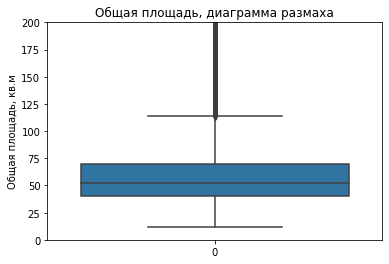

In [ ]:
sns.boxplot(data = df['total_area'])
plt.title('Общая площадь, диаграмма размаха')
plt.ylabel('Общая площадь, кв.м')
plt.ylim(0, 200) #пришлось тут тоже выставить лимит, потому что были не видны границы нормальных значений
plt.show()

Нормальные значения находятся между 0 и 120 кв.м, остальное выбросы. Строим диаграмму, выставив ограничение по значениям от 0 до 120

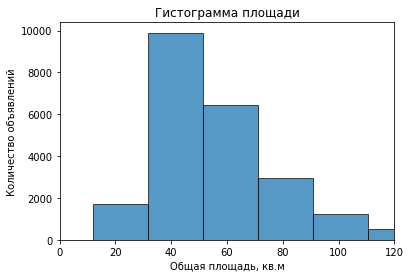

In [ ]:
sns.histplot(df['total_area'], kde=False, bins=45)
plt.xlim(0, 120)
plt.title('Гистограмма площади')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Количество объявлений')
plt.show()

На продажу чаще всего выставляются квартиры от 32 до 56 кв.м.

**Цена**

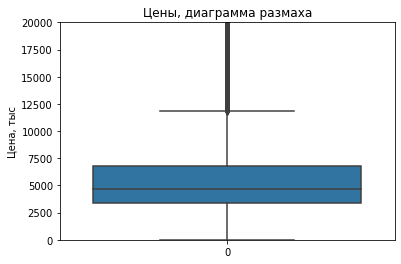

In [ ]:
sns.boxplot(data = df['last_price'])
plt.title('Цены, диаграмма размаха')
plt.ylabel('Цена, тыс')
plt.ylim(0, 20000) #пришлось тут тоже выставить лимит, потому что были не видны границы нормальных значений
plt.show()

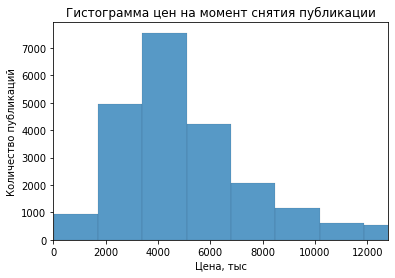

In [ ]:
sns.histplot(df['last_price'], kde=False, bins=450)
plt.xlim(0, 12800)
plt.title('Гистограмма цен на момент снятия публикации')
plt.xlabel('Цена, тыс')
plt.ylabel('Количество публикаций')
plt.show()

Самая распространённая стоимость — от 3 до 6 млн.

**Число комнат**

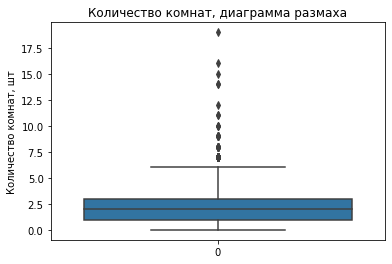

In [ ]:
sns.boxplot(data = df['rooms'])
plt.title('Количество комнат, диаграмма размаха')
plt.ylabel('Количество комнат, шт')
plt.show()

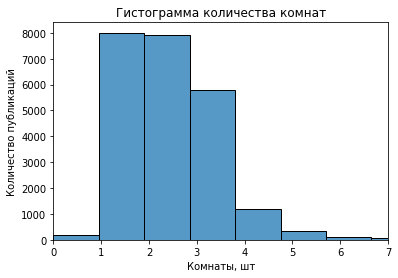

In [ ]:
sns.histplot(df['rooms'], kde=False, bins=20)
plt.xlim(0, 7)
plt.title('Гистограмма количества комнат')
plt.xlabel('Комнаты, шт')
plt.ylabel('Количество публикаций')
plt.show()

Почти 2/3 квартир — однушки или двушки, чуть меньший процент квартир имеют 3 комнаты и небольшое количество - 4.

**Высота потолков**

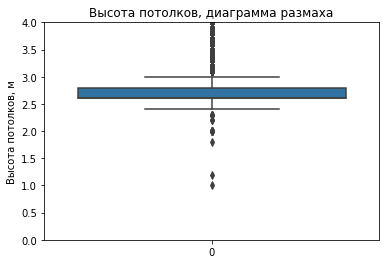

In [ ]:
sns.boxplot(data = df['ceiling_height'])
plt.title('Высота потолков, диаграмма размаха')
plt.ylabel('Высота потолков, м')
plt.ylim(0, 4) #пришлось тут тоже выставить лимит, потому что были не видны границы нормальных значений
plt.show()

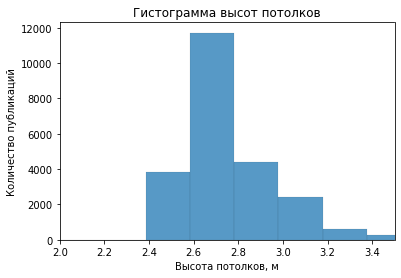

In [ ]:
sns.histplot(df['ceiling_height'], kde=False, bins=500)
plt.xlim(2, 3.5)
plt.title('Гистограмма высот потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество публикаций')
plt.show()

Самая распространённая высота потолков 2.4-2.7 метров.

### Задача 2

Изучить время продажи квартиры. Построить гистограмму. Посчитать среднее и медиану. Описать, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [ ]:
df['days_exposition'].describe().to_frame() #чтобы красиво отображалось в табличке

,days_exposition
count,20393.000000
mean,180.747659
std,219.736349
min,1.000000
25%,45.000000
50%,95.000000
75%,231.000000
max,1580.000000


In [ ]:
df['days_exposition'].median()

95.0

Среднее время продажи - полгода, 180 дней. Медианное - 95 дней. 3 месяца для продажи квартиры - очень неплохой срок.
1580 дней — максимальный срок, это 4 года, судя по медианному значению, это долго. Наверное или очень дорогая квартира или необосновано дорогая/подозрительно дешёвая.

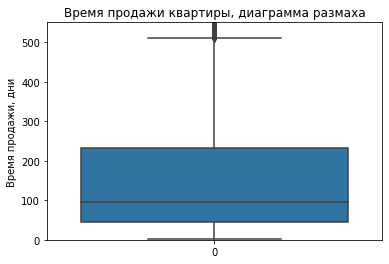

In [ ]:
sns.boxplot(data = df['days_exposition'])
plt.title('Время продажи квартиры, диаграмма размаха')
plt.ylabel('Время продажи, дни')
plt.ylim(0, 550) #пришлось тут тоже выставить лимит, потому что были не видны границы нормальных значений
plt.show()

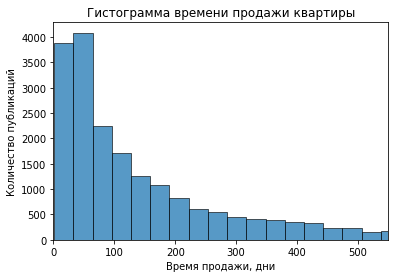

In [ ]:
sns.histplot(df['days_exposition'], kde=False, bins=50)
plt.xlim(0, 550)
plt.title('Гистограмма времени продажи квартиры')
plt.xlabel('Время продажи, дни')
plt.ylabel('Количество публикаций')
plt.show()

Большая часть квартир продалась в течение первых 50 дней после опубликования объявления, есть и квартиры, которые продавались до года и чуть больше. Количество объявлений, которые висят более года существенно меньше.

<div class="alert alert-block alert-warning">

### Комментарий ревьюера
    
#### Совет
    
Если ты здесь поставишь больше корзин, то заметишь выбивающиеся значения 45, 60 и 95 дней. Это особенность площадки Яндекс.Недвижимость. Именно через столько дней она убирает с показа бесплатные объявления.
</div>

### Выводы по 1 и 2 задачам

1. Большая часть квартир имеет метраж от 30 до 70 кв.м, пик приходится на 40-50 кв.м. Как раз этот метраж подходит под однушки и двушки, которые чаще всего продают.  
  
Но у нас ещё есть редкие и выбивающися значения площадей квартир и аппартаментов. Например, минимальный метраж квартиры у нас 12 кв. метров. Это точно не опечатка и не аномалия, такие квартиры правда [продают](https://www.cian.ru/kupit-kvartiru-12-m2/). Маленькие, зато свои :)
Обычно это переоборудованные кладовые.
  
Обратим внимание теперь на большую площадь — 900 квадратных метров. Это уже целый ангар или склад. Возможно, его пытались продать как некоммерческое здание, чтобы его поскорее купили, например. Это уже выброс, на такие значения посмотрим поближе дальше.

2. Как правило, продажа недвижимости занимала 3 месяца (95 дней). При этом четверть всех объектов недвижимости была продана в течение 45-60 дней с момента публикации.
  
Изучила, как долго происходит процесс купли-продажи квартиры: около 5 дней требуется только на рассмотрение регистрации заявления на переоформление собственности, если заявление подаётся через МФЦ. В реальности процесс может затягиваться и на месяцы.
Если объект был "продан" в течение первой же недели (7 календарных дней), то необходимо проверить данную сделку на предмет мошенничества.
Ещё как вариант — не мошенничество, а наличие автоматического закрытия объявления. Если продавец не заходит и не смотрит отклики, то, возможно, система считает, что объявление утратило актуальность и закрывает его. Объявления, закрытые самими пользователями, тоже могут быть. Я бы посчитала аномальными все закрытые сделки в течение первых 7 дней после публикации.


3. В наибольшем количестве объявлений о продаже квартир цены лежат в промежутке между 3 и 6 млн. Вполне реальная стоимость (если в рублях) за однокомнатные/двухкомнатные квартиры бюджетного класса несколькогодичной давности.  
  
Обратим внимание на саму низкую цену — 12 тысяч. Даже за 12 квадратов это ничтожно мало.
Возможно, это опечатка, поближе посмотрим сколько по такой стоимости квартир дальше: возможно, от них придётся избавиться.

Самое большая же цена — 763 миллиона. Сейчас столько стоят элитные таунхасы, стоимость правдоподобная. Кстати, даже за такую сумму у меня не получилось найти жилые помещения в 900 кв. м.

4. Почти 2/3 квартир имеют 1 или 2 комнаты. Что касается 19-ти комнатных квартир, то скорее всего это таунхаусы под свободную отделку (не нашла уже готовых с таким количеством комнат за последние 3 года) либо коммуналки/общежития.

5. Минимальная высота потолка — 2,4-2,5 м по СНиП. Большинство квартир этому соответствуют. Но если мы посмотрим на таблицу с обзором данных, то увидим, что есть потолок и 1м, и 100м (это этажей 30). Супер странные значения, посмотрим на них повнимательнее дальше.



### Задача 3

Убрать редкие и выбивающиеся значения. Описать, какие особенности обнаружили.

In [ ]:
df['rooms'].value_counts().sort_values(ascending=False)

1     8004
2     7897
3     5778
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

Чем больше комнат, тем меньше предложений. Отсечём редкие значения — для исследования будем брать квартиры с 7 комнатами максимум.  
  
Теперь взглянем на высоту потолков. Посмотрим сколько у нас предложений с очень низкими потолками, которые не соответствуют правилам.

In [ ]:
df[df['ceiling_height'] < 2.4]['ceiling_height'].value_counts().sort_values(ascending=False)

2.0    11
2.3     5
2.2     2
1.8     1
1.2     1
1.0     1
Name: ceiling_height, dtype: int64

Их совсем немного. Можем от них смело избавиться, нижней границей среза по высоте потлков будет минимальное значение по СНиП — 2.4 м.
В качестве максимальной границы возьмём примерную высоту 2 этажей — 5м. В современных люксовых домах проектируют некоторые аппартаменты так, что делают гостинные с высотой потолка в 2 этажа, а остальные комнаты размещаются на этажах как обычно.

Теперь посмотрим на странно маленькие значения стоимости квартир, сколько таких предложений по 12 тысяч

In [ ]:
df[df['last_price'] == 12]['last_price'].value_counts().sort_values(ascending=False)

12    1
Name: last_price, dtype: int64

Всего одно. Скорее всего это опечатка или ещё какая-нибудь аномалия.  
Для дальнейшего исследования не будем брать очень дешёвые предложения: выделим только квартиры выше 1 млн.

Посмотрим теперь, много ли у нас квартир по площади больше 400 кв. м. Это уже размеры аппартаментов в несколько этажей.

In [ ]:
df[df['total_area'] > 400]['total_area'].value_counts().sort_values(ascending=False)

500.0    2
460.8    1
410.0    1
507.0    1
431.0    1
401.0    1
442.0    1
631.0    1
470.3    1
413.5    1
402.0    1
494.1    1
491.0    1
631.2    1
483.9    1
488.0    1
517.0    1
900.0    1
618.0    1
495.0    1
590.0    1
422.2    1
Name: total_area, dtype: int64

Не много, установим верхнюю границу по этому числу.  

Теперь избавляемся от редких и выбивающихся значений

In [ ]:
df = df.query('total_area <= 400 and last_price >= 1000 and rooms <= 7 and 2.4 <= ceiling_height <= 5 and days_exposition >= 7')

In [ ]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_of_m2,day,month,year,living_area_part,kitchen_area_part
count,19521.000000,19521.000000,19521.000000,19521.000000,19521.000000,19521.000000,17926.000000,19521.000000,17602.000000,19521.000000,...,6636.000000,15198.000000,7575.000000,19521.000000,19521.000000,19521.000000,19521.000000,19521.000000,17926.000000,17602.000000
mean,9.651708,6171.232263,58.539066,2.021259,2.714338,10.916346,33.351026,5.999488,10.429963,0.596486,...,491.762206,0.762206,520.547855,186.206444,98.443985,2.570309,6.586804,2017.199631,0.561988,0.189206
std,5.631808,9381.298408,30.495685,1.011263,0.216927,6.637173,19.628246,4.942373,5.527174,0.952147,...,346.165558,0.931934,276.783347,220.939266,46.294645,1.779692,3.488088,0.965518,0.109539,0.081297
min,0.000000,1000.000000,12.000000,0.000000,2.400000,1.000000,2.000000,1.000000,2.000000,0.000000,...,1.000000,0.000000,13.000000,7.000000,10.510000,0.000000,1.000000,2014.000000,0.000000,0.000000
25%,6.000000,3400.000000,40.000000,1.000000,2.600000,5.000000,18.300000,2.000000,7.000000,0.000000,...,287.000000,0.000000,301.000000,45.000000,76.950000,1.000000,3.000000,2017.000000,0.500000,0.100000
50%,9.000000,4550.000000,51.000000,2.000000,2.600000,9.000000,30.000000,4.000000,9.200000,0.000000,...,451.500000,0.000000,506.000000,100.000000,94.290000,3.000000,7.000000,2017.000000,0.600000,0.200000
75%,14.000000,6500.000000,68.000000,3.000000,2.800000,16.000000,41.900000,8.000000,12.000000,1.000000,...,615.000000,1.000000,731.000000,238.000000,112.310000,4.000000,10.000000,2018.000000,0.600000,0.200000
max,50.000000,763000.000000,400.000000,7.000000,4.900000,60.000000,255.700000,33.000000,107.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1907.500000,6.000000,12.000000,2019.000000,1.000000,0.800000


<div class="alert alert-block alert-warning">

### Комментарий ревьюера
    
#### Совет
    
Смотри, важно всегда помнить, что необходимо отсекать не более 10 % от первоначальных данных. У тебя получилось слегка больше. Я не буду засчитывать это за ошибку, так как у тебя в целом по проекту все прекрасно. На будущее, пожалуйста, учитывай это. Что когда удаляем более 10%, то данные могут исказиться.
</div>

### Вывод по задаче 3

Мы почистили редкие и аномальные значения:
1. Убрали недвижимость площадью более 400 квадратов
2. Убрали недвижимость стоимостью менее 1 миллиона
3. Убрали квартиры, где комнат более 7
4. Убрали квартиры с очень низкой высотой потолков, не подходящие под требования и со слишким высокими потолками в несколько этажей.
5. Убрали объявления, которые были закрыты в течение первой календарной недели после открытия.

### Задача 4

Какие факторы больше всего влияют на стоимость квартиры? Изучить, зависит ли цена от площади, числа комнат, удалённости от центра. Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучить зависимость от даты размещения: дня недели, месяца и года.

Для того, чтобы оценить зависимость цены от площади, числа комнат и удалённости от центра, построим матрицу корреляций.

In [ ]:
corr = df[['last_price','total_area','city_centers_nearest','rooms']].corr()
corr.style.background_gradient(cmap='coolwarm')

,last_price,total_area,city_centers_nearest,rooms
last_price,1.000000,0.603211,-0.208287,0.341085
total_area,0.603211,1.000000,-0.235512,0.772894
city_centers_nearest,-0.208287,-0.235512,1.000000,-0.178908
rooms,0.341085,0.772894,-0.178908,1.000000


Здесь нас будет интересовать первая строчка. Чем ячейка краснее, тем сильнее прямая зависимость, чем синее — тем сильнее обратная зависимость.

Цена ощутимо зависит от общей площади: чем больше площадь, тем выше цена. Но на цену могут влиять внешние факторы: благополучность района, соседи, отделка и т.п., поэтому от дома к дому стоимость может варьироваться, поэтому зависимость мы видим не очень сильную.

Что касается удалённости от центра, то тут уже обратная зависимость: чем дальше квартира от центра, тем она дешевле. Но в случае с Питером не всегда так: на окраинах много исторических мест, есть залив в удаленности от центра с неплохим чистеньким районом, где цена на жилье не сильно меньше, чем в центре. Поэтому зависимость прослеживается, но не сильная.
  
С комнатами такая же ситуация, как с общей площадью — чем больше комнат, тем больше площадь. Но здесь зависимость сильно меньше и скорее стремится к нулю, чем к 1. Могу объяснить это тем, что квартиры часто перепланируют и делают из одной большой две/три маленькие. Количество комнат становится больше, а метраж кваартиры не меняется. А платят всё-таки за метраж, а не количество дверей.

Чтобы посмотреть на зависимость стоимости от категории этажа, я построю столбчатую диаграмму

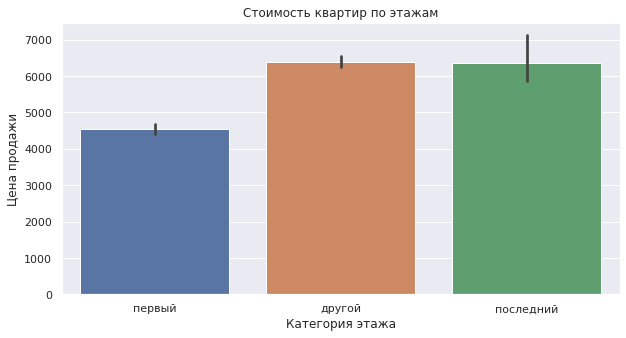

In [ ]:
plt.figure(figsize=(10, 5))

sns.barplot(x='floor_category', y="last_price", data=df)
plt.title('Стоимость квартир по этажам')
plt.xlabel('Категория этажа')
plt.ylabel('Цена продажи')
plt.show()

Какой-то ощутимой зависимости увеличения стоимости квартир на последнем этаже и любом другом, кроме первого, нет. По графику видно, что цена +- одинаковая.
А вот квартиры на первом этаже существенно дешевле, и это логично: там может быть шумно, сыро, на окна придётся дополнительно ставить защиту от воров.

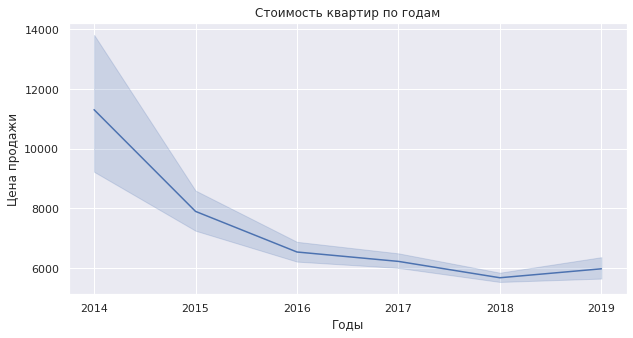

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 5))

plt.title('Стоимость квартир по годам')
plt.xlabel('Годы')
plt.ylabel('Цена продажи')
sns.lineplot(data=df, x ='year', y='last_price')
plt.show()

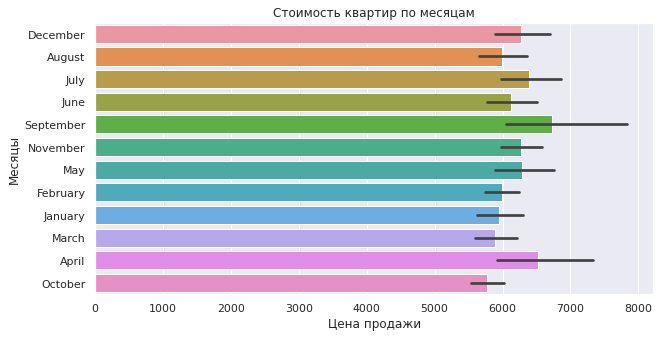

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 5))

sns.barplot(data=df, x ='last_price', y='month_name')
plt.title('Стоимость квартир по месяцам')
plt.xlabel('Цена продажи')
plt.ylabel('Месяцы')
plt.show()

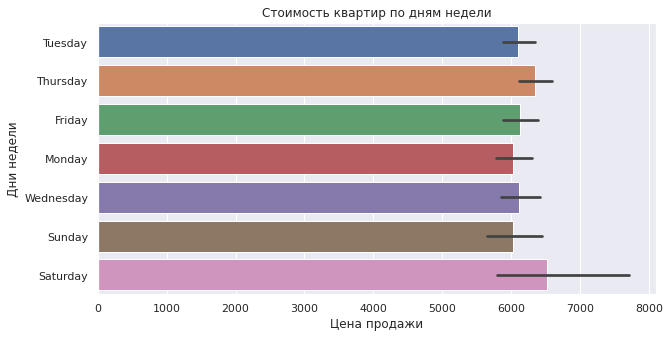

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 5))

sns.barplot(data=df, x = 'last_price', y='day_name')
plt.title('Стоимость квартир по дням недели')
plt.xlabel('Цена продажи')
plt.ylabel('Дни недели')
plt.show()

1. На графике динамики цен по годам мы можем видеть, что наибольшая цена на недвижимость была в районе 2014 года. Это скорее всего связано с кризисом и сопутствующим ему падением рубля. 2015-2016 экономика адаптировалась к введённым санкциям, рубль укреплялся, поэтому в это время стоимость на недвижимость снизилась и была более-менее стабильна. В 2018 цены снова стали расти, но не так стремительно. Это связано с ожиданием перехода застройщиков на проектное финансирование.
2. Самые высокие цены на недвижимость в середине лета/начале осени/середине весны.
3. Зависимости цены от дня недели публикации практически никакой нет. Разве что в среднем цены на квартиры, объявление о продажи которых опубликовано в будний день, чуть выше, чем цена на квартиры с объявлениями, опубликованными в воскресенье и пятницу

### Задача 5

Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитайть среднюю цену квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

In [ ]:

med_price_of_m2 = df.pivot_table(index='locality_name', values='price_of_m2', aggfunc=['count', 'median'])
med_price_of_m2.columns = ['count', 'median']
med_price_of_m2.sort_values('count', ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,13080,103.095
поселок Мурино,527,86.080
поселок Шушары,400,76.220
Всеволожск,331,65.830
Пушкин,297,97.830
Колпино,295,73.910
деревня Кудрово,289,91.670
поселок Парголово,286,91.030
Гатчина,255,67.650


Лидеры по средней цене квадратного метра: Санкт-Петербург, поссёлок Мурино, посёлок Шушары и Всеволожск.

В среднем дешевле всего квадратные метры в Гатчине и Выборге.

### Задача 6

Изучить предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделить квартиры в Санкт-Петербурге (locality_name). Задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайть среднюю цену для каждого километра. Построить график: он должен показывать, как цена зависит от удалённости от центра. Определить границу, где график сильно меняется, — это и будет центральная зона.

In [ ]:
df['city_centers_nearest'] = (df['city_centers_nearest'] / 1000).round()

In [ ]:
spb_data = df.query('locality_name == "Санкт-Петербург"')
spb_center_nearest = spb_data.pivot_table(index='city_centers_nearest', values=['last_price'], aggfunc='median')
spb_center_nearest.head()

,last_price
city_centers_nearest,
0.0,13500.0
1.0,10685.0
2.0,9500.0
3.0,8000.0
4.0,8800.0


<Figure size 720x360 with 0 Axes>

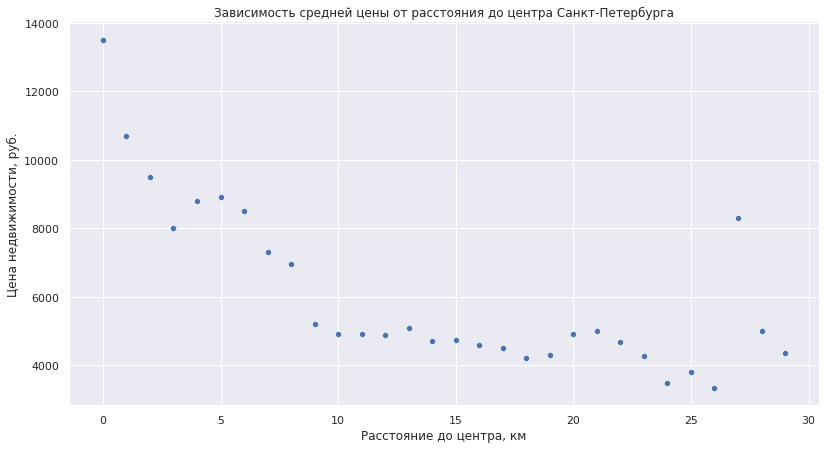

In [ ]:
plt.figure(figsize=(10, 5))

sns.relplot(x=spb_center_nearest.index, y='last_price', data=spb_center_nearest, height=6, aspect=1.9)
plt.title('Зависимость средней цены от расстояния до центра Санкт-Петербурга')
plt.ylabel('Цена недвижимости, руб.')
plt.xlabel('Расстояние до центра, км')
plt.show()

Самая высокая цена в центре города, что логично. Дальше от города она начинает снижаться, но в точке 27 км резко идёт вверх. Предположу, что это курортная зона, где-нибудь на берегу залива.

За центральную зону возьмём 8 километров — в этой точке цена перестаёт стремительно падать вниз.


### Задача 7

Выделить сегмент квартир в центре. Проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделать выводы. Отличаются ли они от общих выводов по всей базе?

In [ ]:
spb_center_zone = df[(df['city_centers_nearest'] <= 8) & (df['locality_name'] == 'Санкт-Петербург')]

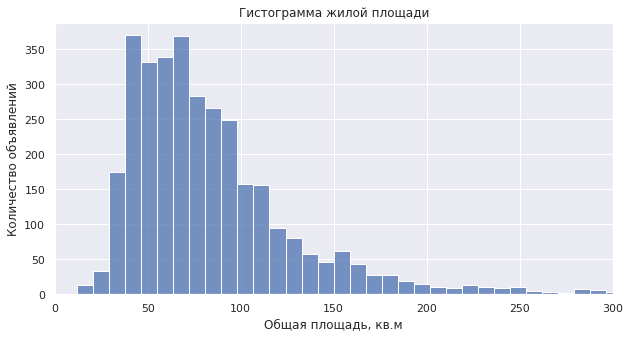

In [ ]:
plt.figure(figsize=(10, 5))

sns.histplot(spb_center_zone['total_area'], kde=False, bins=45)
plt.xlim(0, 300)
plt.title('Гистограмма жилой площади')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Количество объявлений')
plt.show()

В центре очень много объявлений с квартирами 30-70 кв. м., это метраж однокомнатных/двухомнатнывх квартир.

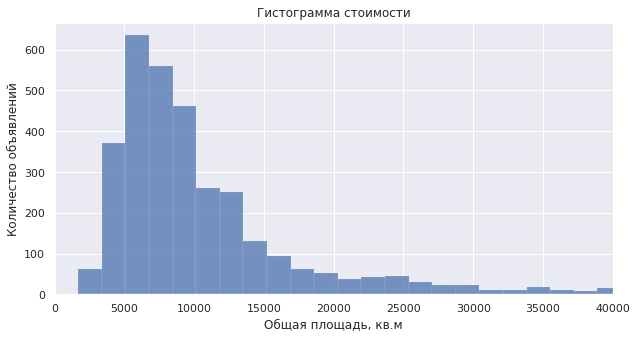

In [ ]:
plt.figure(figsize=(10, 5))

sns.histplot(spb_center_zone['last_price'], kde=False, bins=450)
plt.xlim(0, 40000)
plt.title('Гистограмма стоимости')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Количество объявлений')
plt.show()

Стоимость большинства квартир находится в рамках от 5 до 10 млн

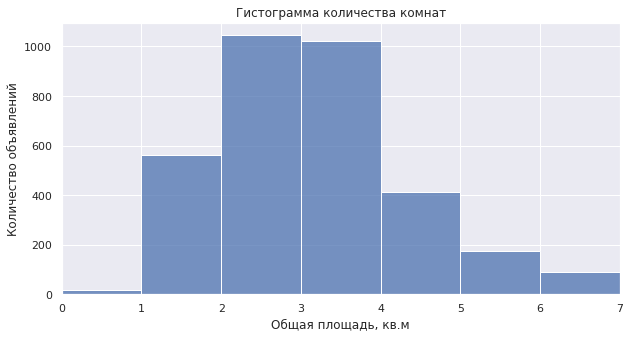

In [ ]:
plt.figure(figsize=(10, 5))

sns.histplot(spb_center_zone['rooms'], kde=False, bins=7)
plt.xlim(0, 7)
plt.title('Гистограмма количества комнат')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Количество объявлений')
plt.show()

В центре очень мало многокомнатных квартир, но зато много двушек и трёшек


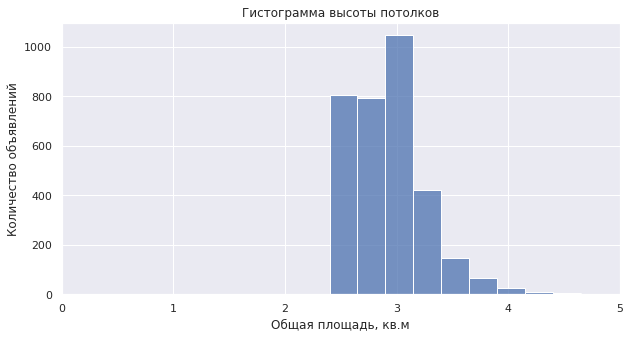

In [ ]:
plt.figure(figsize=(10, 5))

sns.histplot(spb_center_zone['ceiling_height'], kde=False, bins=10)
plt.xlim(0, 5)
plt.title('Гистограмма высоты потолков')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Количество объявлений')
plt.show()

В центральных домах очень много квартир с высокими потолками в 3 метра, такие обычно в старых домах

In [ ]:
corr = spb_center_zone[['last_price', 'total_area', 'city_centers_nearest', 'rooms']].corr()
corr.style.background_gradient(cmap='coolwarm')

,last_price,total_area,city_centers_nearest,rooms
last_price,1.000000,0.578783,-0.091521,0.317672
total_area,0.578783,1.000000,-0.178316,0.768070
city_centers_nearest,-0.091521,-0.178316,1.000000,-0.229873
rooms,0.317672,0.768070,-0.229873,1.000000


На стоимость квадратного метра квартиры в центральной зоне, сильнее всего влияет площадь квартиры и количество комнат. Между стоимостью за квадрат и центром всё ещё отрицательная корреляция.

В целом показатели по квартирам из центра похожи на общие показатели. Особенности:

1. В центре большинство квартир с высокими потолками от 2.8 метров, в других районах высота потолков 2,5-2,7 метров;
2. В центральной зоне большинство квартир имеют 2 и 3 комнаты, в то время как в остальных районах больше по количеству однушек;
3. В центре большая часть квартир имеет метраж 50-70 кв.м., в остальных районах больше квартир поменьше — 40-50 кв.м.
4. Высокая (на момент исследования 😢) стоимость квартир в центре: 5-10 млн

## Общий вывод

В данных было большое количество пропусков: основная часть которых появилась из-за того, что пользователи сервиса не заполняли какие-то пункты, которые были необязательными.  
Стоило бы сделать наиболее важные пункты обязательными: локации(город, поселок и т.), высоту потолков, жилую площпдь, площадь кухни. Если продавцы укажут хотя бы примерные данные, то подобные исследования будут в будущем точнее.

Какие особенности обнаружили во время исследования:
* Стоимость квартир сильно зависит от расстояния от ценра. Причём это работает как для центральной зоны, так и для общего количества населённых пунктов.
* Стоимость квартир, как в центре, так и везде также зависит и от количества комнат и общей площади квартиры: чем площадь и количество комнат больше — тем выше цена.
* Квартиры на первом этаже везде дешевле, чем на каком-либо другом этаже.
* День размещения объявления на стоимость квартир никак не влияет.
* В центре большинство квартир имеет 2-3 комнаты, а в пригородах и других районах Санкт-Петербурга: 1-2 комнаты. Возможно, это связано с архитектурой домов.
* В 2014 году сильно подскочили цены на недвижимость: вероятно на это повлиял кризис и сильное падение рубля на фоне санкций.

Для определения рыночной стоимости объектов недвижимости нам важны следующие параметры:
- общая площадь квартиры. Её было бы хорошо сделать обязательной для заполнения в объявлении.
- расстояние до центра города, который ограничен окружностью радиусом 8 км).
- число комнат и этаж квартиры. Чем больше комнат — тем выше цена, а квартиры на 1 этаже продаются сильно дешевле.
- срок продажи квартиры. Объявления, в которых давно не было активности продавца, возможно, следует закрывать, тогда в статистике будут отражены данные поточнее: возможно, что кто-то, продав квартиру, просто забывает о своём объявлении.
- высота потолков. Тоже важный параметр — его стоит сделать обязательным для заполнения и ограничить возможность ручного ввода: так можно избежать опечаток и пропущенных значений.